In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [2]:
# Exercise 1- Conceptual Calculations

parent_counts = [60, 40]

pA, pB = 60/100, 40/100
gini_parent = 1 - (pA**2 + pB**2)
print(f"Gini of parent node: {gini_parent:.4f}")

from math import log2
entropy_parent = -(pA * log2(pA) + pB * log2(pB))
print(f"Entropy of parent node: {entropy_parent:.4f}\n")

gini_child1_s1 = 0
gini_child2_s1 = 1 - ((20/45)**2 + (25/45)**2)

gini_after_s1 = (40/100)*0 + (45/100)*gini_child2_s1
ig_s1 = gini_parent - gini_after_s1
print(f"IG for Split 1: {ig_s1:.4f}")

gini_child1_s2 = 1 - ((20/60)**2 + (40/60)**2)
gini_child2_s2 = 1 - ((40/55)**2 + (15/55)**2)

gini_after_s2 = (60/100)*gini_child1_s2 + (55/100)*gini_child2_s2
ig_s2 = gini_parent - gini_after_s2
print(f"IG for Split 2: {ig_s2:.4f}")

if ig_s1 > ig_s2:
    print("Decision: Use Split 1 (higher IG)")
else:
    print("Decision: Use Split 2 (higher IG)")

Gini of parent node: 0.4800
Entropy of parent node: 0.9710

IG for Split 1: 0.2578
IG for Split 2: -0.0048
Decision: Use Split 1 (higher IG)


C:\Users\user\AppData\Local\Temp\ipykernel_1360\3569040885.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_1360\3569040885.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

=== DECISION TREE ===
Accuracy: 0.7989
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       105
           1       0.83      0.65      0.73        74

    accuracy                           0.80       179
   macro avg       0.81      0.78      0.78       179
weighted avg       0.80      0.80      0.79       179



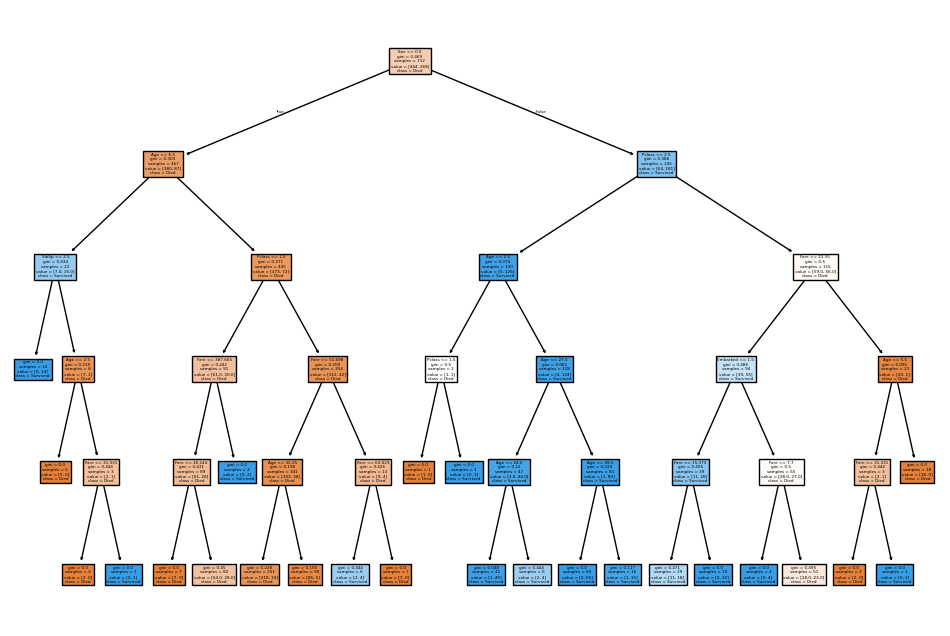


=== RANDOM FOREST ===
Accuracy: 0.8156
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       105
           1       0.79      0.76      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.81      0.82      0.82       179


=== COMPARISON ===
Decision Tree Accuracy: 0.7989
Random Forest Accuracy: 0.8156
Random Forest performed better


In [3]:
# Exercise 2- Titanic Prediction

df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

df = df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("=== DECISION TREE ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print(classification_report(y_test, y_pred_dt))

plt.figure(figsize=(12, 8))
plot_tree(dt, feature_names=X.columns, class_names=['Died', 'Survived'], filled=True)
plt.show()

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("\n=== RANDOM FOREST ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(classification_report(y_test, y_pred_rf))

print("\n=== COMPARISON ===")
print(f"Decision Tree Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
if accuracy_score(y_test, y_pred_rf) > accuracy_score(y_test, y_pred_dt):
    print("Random Forest performed better")
else:
    print("Decision Tree performed better")

Exercise 3- Loss Function Answer

Question- Which loss function was used in your decision tree and random forest? Why?

Answer:
The default criterion in scikit-learn's `DecisionTreeClassifier` and `RandomForestClassifier` is Gini Impurity.

Why Gini over Entropy?
1. Computational efficiency: Gini doesn't require logarithmic calculations
2. Similar results in practice: Both criteria usually lead to similar tree structures
3. Faster convergence: Gini tends to isolate the most frequent class earlier

Хow it works:
- Both algorithms use the same splitting criterion at each node
- They find the split that maximizes information gain
- Information Gain = Parent Node Impurity - Weighted Average of Children Impurities



In [ ]:
#To use Entropy instead:
dt = DecisionTreeClassifier(criterion='entropy')
rf = RandomForestClassifier(criterion='entropy')

Conclusion: Gini is used by default for efficiency, but both Gini and Entropy give comparable results.